# Capstone 2 Project - Russian Troll Group - NonEnglish

In the analysis of each troll group, each of the troll groups* will be segmented out and analyzed each individually.  The "troll classes", as defined by Clemson University's Darren Linvill and Patrick Warren in their analysis of the Russian Troll Farm Twitter data.

I will analyze the Troll Groups to explore questions about the nature of the disinformation campaign, such as:
* Did other trolls retweet and amplify troll tweets?
* Can common topics or themes be identified?
* What were the most-used hashtags?
* Did the tweets predominantly support one candidate or political party, or seek to undermine the other?

## Data Dictionary

Header | Definition
-------|---------
`external_author_id` | An author account ID from Twitter 
`author` | The handle sending the tweet
`content` | The text of the tweet
`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?   id=000199367&type=1)
`language` | The language of the tweet
`publish_date` | The date and time the tweet was sent
`harvested_date` | The date and time the tweet was collected by Social Studio
`following` | The number of accounts the handle was following at the time of the tweet
`followers` | The number of followers the handle had at the time of the tweet
`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
`post_type` | Indicates if the tweet was a retweet or a quote-tweet
`account_type` | Specific account theme, as coded by Linvill and Warren
`retweet` | A binary indicator of whether or not the tweet is a retweet
`account_category` | General account theme, as coded by Linvill and Warren
`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018

In [1]:
# import standard libraries
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#import numpy as np
#import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
#get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# import nltk libraries
from nltk.corpus import stopwords
from nltk import FreqDist
#nltk.download('stopwords') # run one time

In [3]:
# import gensim libraries
from gensim.models.ldamulticore import LdaMulticore
from gensim.test.utils import datapath
from gensim import corpora
from gensim.utils import any2unicode

In [4]:
# read each troll classification file as 'df', for repurposing code for each class
# nrows=100, 
full_df = pd.read_csv('../data/all_IRAhandle_tweets.csv', parse_dates = ['publish_date'], low_memory=False)
#name = 'Right Troll'

In [5]:
df = full_df[full_df['account_category'] == "NonEnglish"]

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)
# drop rows with problematic character encoding
#df.drop([58, 59], axis=0, inplace=True)
#df.head()

/Users/admin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
df['cleaned'] = df['content'].fillna('').astype(str).map(any2unicode)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Text Preprocessing
* Noise Removal
* Tokenization
* Normalization  
(1) stemming
(2) lemmatization, and 
(3) everything else

### Remove URLs and non-English Characters

In [8]:
def preprocess_text(text):
    '''Remove URLs and Non-English characters, except for @ and #'''
    # remove URL's
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

    # remove symbols excluding the @, # and \s symbol
    text = re.sub(r'[^\w@#\s]', '', text)

    # remove URL's
    text = re.sub('(https://[^\s]+)', '', text)
    text = re.sub('https?://[A-Za-z0-9./]+', '', text)

    # remove URL's
    text = re.sub('http?://[A-Za-z0-9./]+', '', text)

    # lowercase, remove words less than len 2 & remove numbers in tokenized list
    #return [word.lower() for word in text if len(word) > 2 and not word.isdigit() and not word in ignore_words]
    return text

In [9]:
df['cleaned'] = df['cleaned'].apply(preprocess_text)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Hashtag Analysis

In [10]:
# regex to find hashtags
hashtag_re = re.compile("(?:^|\s)[＃#]{1}(\w+)", re.UNICODE)

def extract_hashtags(tweet):
    '''Take in tweet contents from 'cleaned' content, extract hashtags and return cleaned text'''
    hashtags_only = []
    if len(re.findall(hashtag_re, tweet)) > 0:
        hashtags_only.append(re.findall(hashtag_re, tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

In [11]:
# Create a new column to store hashtags, extract hashtags from 'content'
df['hashtags'] = df['cleaned'].map(extract_hashtags)
df['hashtags'].head(25)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


372     [67]
373     [70]
374     [74]
375     [75]
376     [77]
377      [1]
378      [2]
379      [5]
380      [8]
381      [9]
382     [10]
383     [27]
384     [37]
385     [90]
386     [94]
387     [95]
388     [81]
389    [102]
390    [103]
391     [86]
392    [104]
393    [112]
394    [113]
395    [117]
396    [105]
Name: hashtags, dtype: object

In [12]:
# remove all hashtags from a tweet
def remove_hashtags(tweet):
    '''After extracting hashtags, take in tweet content and remove hashtags'''
    hashtags_only = []
    if len(re.findall(hashtag_re, tweet)) > 0:
        tweet = re.sub(hashtag_re, "", tweet)
    hashtags_only.append(tweet)
    return hashtags_only[0]

In [13]:
# Clean hashtags fron 'cleaned' content
df['cleaned'] = df['cleaned'].apply(remove_hashtags)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# create a list of all hashtags
all_hashtags = df['hashtags'].tolist()

# all_hashtags is a list of lists.
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# remove the '0' from the list
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

# cleaned_hashtags list
cleaned_hashtags = remove_values_from_list(cleaned_hashtags, 0)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()
print(hashtag_counts[:25])

0                    677146
новости               10314
Merkelmussbleiben      5818
Merkel                 4565
Россия                 3484
Пластмассовыйвек       3054
РФ                     2706
СПб                    2408
США                    2327
политика               2195
hitech                 2188
JugendmitMerkel        1911
спорт                  1688
TagderJugend           1678
Украина                1666
Тюмень                 1553
Erdogan                1451
news                   1450
Deutschland            1447
Flüchtlinge            1402
НевскиеНовости         1379
CDU                    1288
спб                    1261
ВСУ                    1251
usa                    1213
dtype: int64


### Get User Mentions

In [15]:
#Regex to get user mentions "@":
#twitter_username_re = re.compile("(?:^|\s)[＠ @]{1}([^\s#<>[\]|{}]+)", re.UNICODE)
twitter_username_re = re.compile("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", re.UNICODE)

def extract_usermentions(tweet):
    '''Take in tweet contents from 'cleaned' col and extract user mentions'''
    mentions_only = []
    if len(re.findall(twitter_username_re, tweet)) > 0:
        mentions_only.append(re.findall(twitter_username_re, tweet))
    else:
        mentions_only.append(["0"])
    return mentions_only[0]

In [16]:
# make a new column to store the extracted mentions
df['mentions'] = df['cleaned'].map(extract_usermentions)
df['mentions'].head(10)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


372    [0]
373    [0]
374    [0]
375    [0]
376    [0]
377    [0]
378    [0]
379    [0]
380    [0]
381    [0]
Name: mentions, dtype: object

In [17]:
# create a list of all mentions
all_mentions = df['mentions'].tolist()

# all_hashtags is a list of lists.
cleaned_mentions = []
for i in all_mentions:
    for j in i:
            cleaned_mentions.append(j)

# remove the '0' from the list
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

# cleaned_mentions list
cleaned_mentions = remove_values_from_list(cleaned_mentions, 0)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_mentions_series = pd.Series(cleaned_mentions)
mention_counts = cleaned_mentions_series.value_counts()
# remove first element with values of '0'
# mention_counts = del mention_counts[0]
print(mention_counts[:25])

0                    764839
YouTube                4935
rus_improvisation      2485
salty_1970             1068
realDonaldTrump         866
GrahamWP_UK             797
SFGO76                  659
MariaSharapova          602
MatchTV                 517
byDrBre                 482
wylsacom                456
welt                    430
rubin_paceka            430
russdem                 426
marina_al_22889         417
MaxDementiev            404
SPB_citizen             388
zubovnik                345
LevSharansky            339
Dasssha2010             321
ComradZampolit          308
Spoontamer              305
volkova_v               288
korobkov                282
DLGreez                 274
dtype: int64


In [18]:
# remove all mentions from a tweet
def remove_mentions(tweet):
    '''Take tweet content and remove @mentions from it'''
    mentions_only = []
    if len(re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", tweet)) > 0:
        tweet = re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", "", tweet)
    mentions_only.append(tweet)
    return mentions_only[0]

In [19]:
#create list of content with no hashtags
df['cleaned'] = df['cleaned'].apply(remove_mentions)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
# remove unwanted characters, numbers and symbols from the remaining content
#df['cleaned'] = df['cleaned'].str.replace("[^a-zA-Z#]", " ")

### Create dataframes for the troll classifications
Create dataframes for each troll classification, for easier size to work with.

In [21]:
#right_troll = df.loc[df['account_category'] == 'RightTroll']
#nonenglish = df.loc[df['account_category'] == 'NonEnglish']
#fearmonger = df.loc[df['account_category'] == 'Fearmonger']
#left_troll = df.loc[df['account_category'] == 'LeftTroll']
#hashtagamer = df.loc[df['account_category'] == 'HashtagGamer']
#newsfeed = df.loc[df['account_category'] == 'NewsFeed']
#commercial = df.loc[df['account_category'] == 'Commercial']

In [22]:
#right_troll.to_csv("../data/right_troll.csv")
#nonenglish.to_csv("../data/nonenglish.csv")
#fearmonger.to_csv("../data/fearmonger.csv")
#left_troll.to_csv("../data/left_troll.csv")
#hashtagamer.to_csv("../data/hashtagamer.csv")
#newsfeed.to_csv("../data/newsfeed.csv")
#commercial.to_csv("../data/commercial.csv")

## Remove stopwords
Remove words < 3 letters, convert to lower case

In [23]:
df.cleaned.head()

372                          Причина Мутко ЗенитАрене для адаптации к ЧМ потребуется 152 млрд рублей
373                                               Причина Житель Самары умер в очереди в поликлинике
374                         Причина Президентский советник предложил ограничить Интернет как в Китае
375                                      Причина Казаков благословили на защиту интернетпространства
376    Причина В Кстово полицейские сломали женщине лицевую кость когда та отказалась показать грудь
Name: cleaned, dtype: object

In [24]:
# remove short words (length < 3)
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# transform to lower-case
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#train['tweet'].head()

#stop = set(stopwords.words('english'))
stop = stopwords.words('english')

#extend/add to stopwords - words that are commonly occuring but add no meaning
#stopword_list += ['http', 'https', 'âµã', 'â½ã', 'â²ã', 'âºã', 'â¼ã', 'âµ']
newStop = ['you','get', 'amp', 'one', 'new']
stop.extend(newStop)

df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['cleaned'].head()

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

372                          причина мутко зенитарене для адаптации потребуется 152 млрд рублей
373                                              причина житель самары умер очереди поликлинике
374                      причина президентский советник предложил ограничить интернет как китае
375                                    причина казаков благословили защиту интернетпространства
376    причина кстово полицейские сломали женщине лицевую кость когда отказалась показать грудь
Name: cleaned, dtype: object

In [25]:
#convert 'cleaned' Series to a list
content = df['cleaned'].tolist()
#content[:50]

### Re-Check Fequency Distribution
Re-check the word frequency distribution after doing some cleaning of the text.

In [26]:
# function to plot most frequent terms
def freq_words(x, terms = 20):
    ''' Take in a list of content, split into individual words, count occurrences, list 20 highest occurring words'''
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    return d

In [27]:
counts = freq_words(content, 20)
print(counts)

         word  count
205    россии  31073
149       что  29688
8343      сша  24804
3         для  22472
19        как  18941
21284     die  15502
8288    сирии  15239
5482      der  14460
305       это  14183
65       года  13751
22278     und  11367
10805   видео  11242
136    россия  11075
37      путин  10861
10978     сми  10319
8344     изза  10172
169     после  10146
8274   против  10085
8405    будет   9987
56        под   9740


### Plot most frequently occurring words 

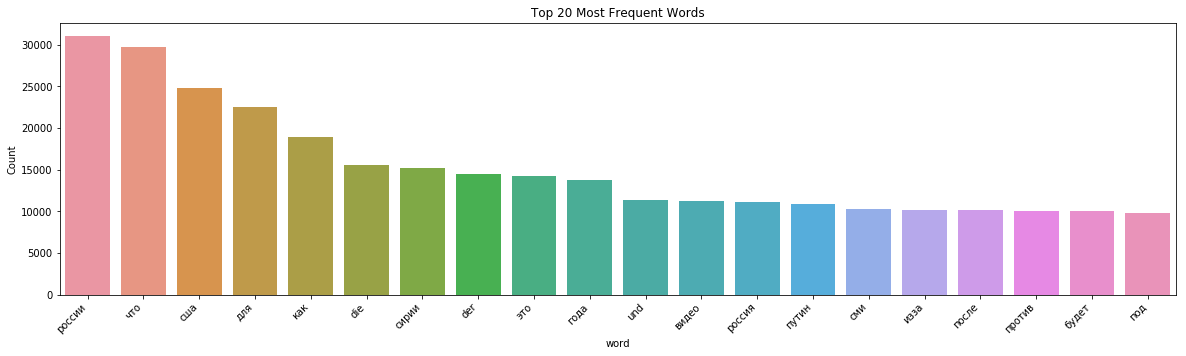

In [28]:
# Plot most frequent words
plt.figure(figsize=(20,5))
# rotate and right align group names
plt.xticks(rotation=45, ha='right')
ax = sns.barplot(data=counts, x= "word", y = "count")
ax.set(ylabel = 'Count')
ax.set(title = 'Top 20 Most Frequent Words')    
plt.show()

## Troll Amplification
Examining the troll "echo chamber". Are trolls retweeting or mentioning other trolls?

In [29]:
# read list of users created during EDA
users = pd.read_csv('../data/users_totals.csv', encoding='utf-8',low_memory=False)

userlist = users['author'].tolist()
lc_userlist = [x.lower() for x in userlist]
lc_userlist.sort()

amplify = cleaned_mentions_series[cleaned_mentions_series.isin(lc_userlist)]

print(amplify.shape[0])

# Get counts of amplified troll tweets
amp_counts = amplify.value_counts()
print("There are",(amplify.shape[0]), "trolls in the echo chamber.")

982
There are 982 trolls in the echo chamber.


### Normalization
3 distinct steps:  
* stemming  
* lemmatization  
* everything else

### Lemmatization

In [30]:
from textblob import Word
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['cleaned'].head()

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


372                          причина мутко зенитарене для адаптации потребуется 152 млрд рублей
373                                              причина житель самары умер очереди поликлинике
374                      причина президентский советник предложил ограничить интернет как китае
375                                    причина казаков благословили защиту интернетпространства
376    причина кстово полицейские сломали женщине лицевую кость когда отказалась показать грудь
Name: cleaned, dtype: object

### Tokenize

In [31]:
#create a list from df['cleaned']
content_notags = df['cleaned'].tolist()

# First, create a new column with the tokenized text
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
#df['tokenized_text'] = df['content'].apply(tt.tokenize)
# map tt.tokenize to 'content' list
documents = list(map(tt.tokenize, content_notags))

In [32]:
from collections import defaultdict

frequency = defaultdict(int)
for document in documents:
    for token in document:
        frequency[token] += 1

In [33]:
documents = [[token for token in document if frequency[token] > 10] for document in documents]
# create a dictionary using from gensim.corpora.Dictionary
dictionary = corpora.Dictionary(documents)
#Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples. 
corpus = [dictionary.doc2bow(document) for document in documents]

In [34]:
len(corpus)

820803

## LDA Model
Fit an LDA Model for the tweet topics

In [35]:
# comment out once model is trained.
# fit LDA model
tweet_topics = LdaMulticore(corpus=corpus,
                          id2word=dictionary,
                          num_topics=10,
                          passes=10,
                          workers=2)

In [36]:
# save/load model to/from disk

temp_file = datapath("model_right_troll_tweets")
tweet_topics.save(temp_file)

# Load a pretrained model from disk.
#tweet_topics = LdaMulticore.load("model")
# - or -
#m1 = LdaMulticore.load(datapath("lda_3_0_1_model"))

In [37]:
# print out first 10 topics
for i, topic in enumerate(tweet_topics.print_topics(10)):
    print('{} --- {}'.format(i, topic))

0 --- (0, '0.016*"россии" + 0.016*"сирии" + 0.014*"что" + 0.014*"сша" + 0.013*"путин" + 0.010*"для" + 0.009*"россия" + 0.007*"путина" + 0.006*"меня" + 0.006*"заявил"')
1 --- (1, '0.009*"суд" + 0.007*"украины" + 0.007*"трамп" + 0.006*"дело" + 0.005*"трассе" + 0.005*"россии" + 0.004*"области" + 0.004*"для" + 0.004*"изза" + 0.003*"сша"')
2 --- (2, '0.018*"для" + 0.015*"фото" + 0.008*"утро" + 0.008*"акция" + 0.007*"доброе" + 0.007*"петербурге" + 0.005*"россии" + 0.005*"дом" + 0.005*"нового" + 0.005*"российские"')
3 --- (3, '0.032*"сочи" + 0.026*"года" + 0.020*"году" + 0.019*"2016" + 0.019*"2017" + 0.013*"рублей" + 0.011*"россии" + 0.010*"год" + 0.009*"более" + 0.009*"тысяч"')
4 --- (4, '0.018*"видео" + 0.014*"метро" + 0.014*"под" + 0.013*"дтп" + 0.010*"районе" + 0.009*"водитель" + 0.008*"москве" + 0.008*"фото" + 0.007*"области" + 0.007*"lada"')
5 --- (5, '0.010*"und" + 0.009*"россии" + 0.007*"цска" + 0.006*"ростов" + 0.006*"динамо" + 0.006*"матч" + 0.005*"матче" + 0.005*"февраля" + 0.005*"

### Wordcloud
Crate a basic word cloud of the topic groupings

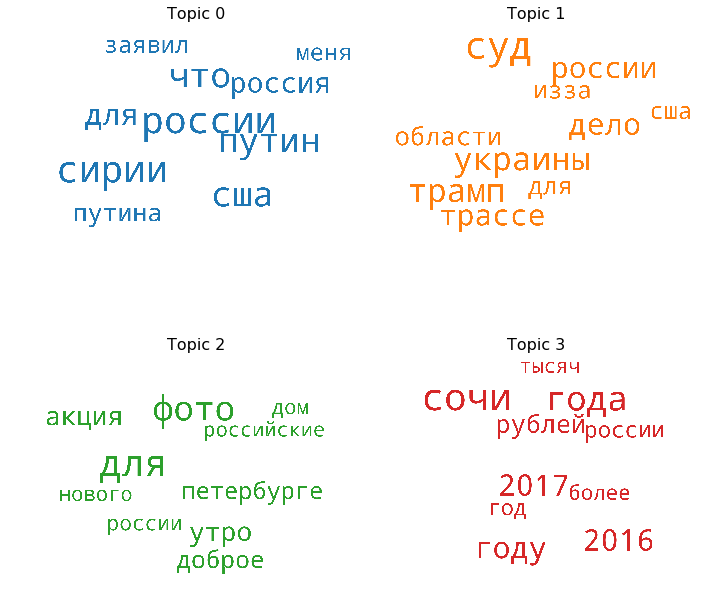

In [38]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = tweet_topics.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Use pyLDAvis library to Visualize Topics

In [39]:
## Try the pyLDAvis visualization
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [40]:
vis_data = gensimvis.prepare(tweet_topics, corpus, dictionary)
pyLDAvis.display(vis_data)

/Users/admin/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Output Visualization Tool to HTML

In [41]:
# save viz output to an HTML file
vis_data = gensimvis.prepare(tweet_topics, corpus, dictionary)

pyLDAvis.save_html(vis_data, 'pyLDAviz_NonEnglish-troll.html')